# Read Data Sample

In [24]:
import pandas as pd
import numpy as np
pd.set_option("display.max_rows",15)
%matplotlib inline

In [69]:
class dataset:
    col_names = ['duration', 'service', 'source_bytes', 'destination_bytes',
                 'count', 'same_srv_rate', 'serror_srv_rate', 'srv_serror_rate',
                 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_src_port_rate',
                 'dst_host_serror_rate', 'dst_host_serror_srv_rate', 'flag',
                 'ids_detection', 'malware_detection', 'ashula_detection', 'label',
                 'source_ip_address', 'source_port_number', 'destination_ip_address',
                 'destination_port_number', 'start_time', 'session'
                ]

    kdd_train = pd.read_csv("dataset/Kyoto2016/2015/01/20150101.txt",names = col_names, sep='\t')
    kdd_train_label = kdd_train.label.copy()
    kdd_train = kdd_train.drop(['start_time', 'source_ip_address', 'destination_ip_address', 'label'], axis = 1)
    #kdd_train.start_time = pd.to_datetime(dataset.kdd_train.start_time, format="%H:%M:%S").dt.total_seconds()
    attack_types = {1:'Normal', -1:'Attack', -2:'Attack'}
    
    kdd_train_label = kdd_train_label.map(lambda x, attack_types = attack_types: attack_types[x])

    kdd_test = pd.read_csv("dataset/Kyoto2016/2015/01/20150102.txt",names = col_names, sep='\t')
    kdd_test_label = kdd_test.label.copy()
    kdd_test = kdd_test.drop(['start_time', 'source_ip_address', 'destination_ip_address', 'label'], axis = 1)
    #kdd_train.start_time = pd.to_datetime(dataset.kdd_train.start_time, format="%H:%M:%S").dt.total_seconds()
    attack_types = {1:'Normal', -1:'Attack', -2:'Attack'}
    
    kdd_test_label = kdd_test_label.map(lambda x, attack_types = attack_types: attack_types[x])

    category_variables = ["service","flag", 'ids_detection', 'malware_detection', 'ashula_detection', 'session']

    for cv in category_variables:
        kdd_train[cv] = kdd_train[cv].astype("category")
        kdd_test[cv] = kdd_test[cv].astype("category")

    kdd_train_label = kdd_train_label.astype("category")
    kdd_test_label = kdd_test_label.astype("category")

dummy_variables_2labels = category_variables
    
class preprocessing:
    kdd_train = pd.get_dummies(dataset.kdd_train, columns = dummy_variables_2labels, prefix=dummy_variables_2labels)
    kdd_test = pd.get_dummies(dataset.kdd_test, columns = dummy_variables_2labels, prefix=dummy_variables_2labels)

    kdd_train_label = pd.get_dummies(dataset.kdd_train_label, prefix='is')
    kdd_test_label = pd.get_dummies(dataset.kdd_test_label, prefix='is')
    

In [70]:
dataset.kdd_train

,duration,service,source_bytes,destination_bytes,count,same_srv_rate,serror_srv_rate,srv_serror_rate,dst_host_count,dst_host_srv_count,dst_host_same_src_port_rate,dst_host_serror_rate,dst_host_serror_srv_rate,flag,ids_detection,malware_detection,ashula_detection,source_port_number,destination_port_number,session
0,0.000000,other,0,0,0,0.0,0.0,0.00,0,0,0.0,0.0,0.0,S0,0,0,0,54992,23,tcp
1,0.000000,other,0,0,0,0.0,0.0,0.00,0,0,0.0,0.0,0.0,S0,0,0,0,47904,23,tcp
2,0.000000,other,0,0,0,0.0,0.0,0.00,0,0,0.0,0.0,0.0,S0,0,0,0,58974,23,tcp
3,0.000000,other,0,0,0,0.0,0.0,0.00,0,0,0.0,0.0,0.0,S0,0,0,0,37174,23,tcp
4,0.000000,other,0,0,0,0.0,0.0,0.00,0,0,0.0,0.0,0.0,S0,0,0,0,40711,3389,tcp
5,0.000052,other,0,0,0,0.0,0.0,0.00,0,0,0.0,0.0,0.0,SH,1325-1-10(1),0,0,8429,22,tcp
6,0.000061,other,0,0,0,0.0,0.0,0.00,0,0,0.0,0.0,0.0,SH,0,0,0,14256,22,tcp
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381098,0.000487,dns,44,104,8,1.0,0.0,0.00,84,99,0.0,0.0,0.0,SF,0,0,0,62206,53,udp
381099,0.000558,dns,44,104,9,1.0,0.0,0.00,84,99,0.0,0.0,0.0,SF,0,0,0,53328,53,udp


In [71]:
dataset.kdd_train_label.unique()

array(['Attack', 'Normal'], dtype=object)

In [72]:
dataset.kdd_train

,duration,service,source_bytes,destination_bytes,count,same_srv_rate,serror_srv_rate,srv_serror_rate,dst_host_count,dst_host_srv_count,dst_host_same_src_port_rate,dst_host_serror_rate,dst_host_serror_srv_rate,flag,ids_detection,malware_detection,ashula_detection,source_port_number,destination_port_number,session
0,0.000000,other,0,0,0,0.0,0.0,0.00,0,0,0.0,0.0,0.0,S0,0,0,0,54992,23,tcp
1,0.000000,other,0,0,0,0.0,0.0,0.00,0,0,0.0,0.0,0.0,S0,0,0,0,47904,23,tcp
2,0.000000,other,0,0,0,0.0,0.0,0.00,0,0,0.0,0.0,0.0,S0,0,0,0,58974,23,tcp
3,0.000000,other,0,0,0,0.0,0.0,0.00,0,0,0.0,0.0,0.0,S0,0,0,0,37174,23,tcp
4,0.000000,other,0,0,0,0.0,0.0,0.00,0,0,0.0,0.0,0.0,S0,0,0,0,40711,3389,tcp
5,0.000052,other,0,0,0,0.0,0.0,0.00,0,0,0.0,0.0,0.0,SH,1325-1-10(1),0,0,8429,22,tcp
6,0.000061,other,0,0,0,0.0,0.0,0.00,0,0,0.0,0.0,0.0,SH,0,0,0,14256,22,tcp
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381098,0.000487,dns,44,104,8,1.0,0.0,0.00,84,99,0.0,0.0,0.0,SF,0,0,0,62206,53,udp
381099,0.000558,dns,44,104,9,1.0,0.0,0.00,84,99,0.0,0.0,0.0,SF,0,0,0,53328,53,udp


In [73]:
dataset.kdd_train.info(memory_usage = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381105 entries, 0 to 381104
Data columns (total 20 columns):
duration                       381105 non-null float64
service                        381105 non-null object
source_bytes                   381105 non-null int64
destination_bytes              381105 non-null int64
count                          381105 non-null int64
same_srv_rate                  381105 non-null float64
serror_srv_rate                381105 non-null float64
srv_serror_rate                381105 non-null float64
dst_host_count                 381105 non-null int64
dst_host_srv_count             381105 non-null int64
dst_host_same_src_port_rate    381105 non-null float64
dst_host_serror_rate           381105 non-null float64
dst_host_serror_srv_rate       381105 non-null float64
flag                           381105 non-null object
ids_detection                  381105 non-null object
malware_detection              381105 non-null object
ashula_detection       

In [74]:
dataset.kdd_train.describe()

,duration,source_bytes,destination_bytes,count,same_srv_rate,serror_srv_rate,srv_serror_rate,dst_host_count,dst_host_srv_count,dst_host_same_src_port_rate,dst_host_serror_rate,dst_host_serror_srv_rate,source_port_number,destination_port_number
count,381105.000000,381105.000000,3.811050e+05,381105.000000,381105.000000,381105.000000,381105.000000,381105.000000,381105.000000,381105.000000,381105.000000,381105.000000,381105.000000,381105.000000
mean,1.158190,130.924239,1.277283e+04,5.165815,0.538854,0.088252,0.461626,31.103822,40.002907,0.020731,0.127513,0.147583,34509.324638,2366.674365
std,21.583013,595.115045,4.129457e+06,8.558491,0.494994,0.275513,0.458620,37.098734,42.750032,0.138584,0.314920,0.333458,20260.102455,7440.934330
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12526.000000,53.000000
50%,0.000475,0.000000,0.000000e+00,1.000000,1.000000,0.000000,0.330000,13.000000,16.000000,0.000000,0.000000,0.000000,40782.000000,53.000000
75%,1.594323,44.000000,1.040000e+02,8.000000,1.000000,0.000000,1.000000,77.000000,95.000000,0.000000,0.000000,0.000000,50449.000000,445.000000
max,12917.812413,103760.000000,1.930672e+09,97.000000,1.000000,1.000000,1.000000,100.000000,100.000000,1.000000,1.000000,1.000000,65535.000000,65533.000000


In [78]:

    
    #print("Length of Categories for {} are {}".format(cv , len(dataset.kdd_train[cv].cat.categories)))
    #print("Categories for {} are {} \n".format(cv ,dataset.kdd_train[cv].cat.categories))

    

In [81]:
preprocessing.kdd_train

,duration,source_bytes,destination_bytes,count,same_srv_rate,serror_srv_rate,srv_serror_rate,dst_host_count,dst_host_srv_count,dst_host_same_src_port_rate,...,malware_detection_Win.Worm.Mydoom-90(1),ashula_detection_0,ashula_detection_349(1),ashula_detection_349(2),ashula_detection_350(1),ashula_detection_809(1),ashula_detection_810(1),session_icmp,session_tcp,session_udp
0,0.000000,0,0,0,0.0,0.0,0.00,0,0,0.0,...,0,1,0,0,0,0,0,0,1,0
1,0.000000,0,0,0,0.0,0.0,0.00,0,0,0.0,...,0,1,0,0,0,0,0,0,1,0
2,0.000000,0,0,0,0.0,0.0,0.00,0,0,0.0,...,0,1,0,0,0,0,0,0,1,0
3,0.000000,0,0,0,0.0,0.0,0.00,0,0,0.0,...,0,1,0,0,0,0,0,0,1,0
4,0.000000,0,0,0,0.0,0.0,0.00,0,0,0.0,...,0,1,0,0,0,0,0,0,1,0
5,0.000052,0,0,0,0.0,0.0,0.00,0,0,0.0,...,0,1,0,0,0,0,0,0,1,0
6,0.000061,0,0,0,0.0,0.0,0.00,0,0,0.0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381098,0.000487,44,104,8,1.0,0.0,0.00,84,99,0.0,...,0,1,0,0,0,0,0,0,0,1
381099,0.000558,44,104,9,1.0,0.0,0.00,84,99,0.0,...,0,1,0,0,0,0,0,0,0,1


In [82]:
preprocessing.kdd_train_label

,is_Attack,is_Normal
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
5,1,0
6,1,0
...,...,...
381098,1,0
381099,1,0


# Zero Data Points

In [35]:
a = dataset.kdd_train.isin([0])
a.sum().sum() / a.size


0.35062751735086128

In [83]:
import matplotlib
from pandas.plotting import andrews_curves
from pandas.plotting import parallel_coordinates
from sklearn import preprocessing as ps
from pandas.plotting import radviz
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

df_train = preprocessing.kdd_train
df_train = pd.concat([df_train, dataset.kdd_train_label], axis = 1)

df_test = preprocessing.kdd_test
df_test = pd.concat([df_test, dataset.kdd_test_label], axis = 1)


In [97]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0)
#np.set_printoptions(suppress=True)
sample = df_train.sample(frac = 0.01) # 10% of total data
sample.to_pickle("dataset/tsne_sample.pkl")
sample = pd.read_pickle("dataset/tsne_sample.pkl")



In [98]:
sample.shape

(3811, 162)

In [99]:
x_tsne = sample.iloc[:, :-1]
y_tsne = sample.iloc[:, -1]


from sklearn.decomposition import SparsePCA
pca_analysis = SparsePCA(n_components=10)
x_tsne_pca = pca_analysis.fit_transform(x_tsne)

In [100]:

pd.DataFrame(x_tsne_pca).to_pickle("dataset/tsne_pca_df.pkl")
x_tsne_pca = pd.read_pickle("dataset/tsne_pca_df.pkl").values

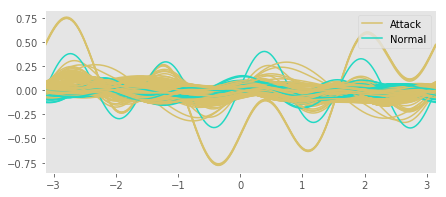

In [101]:
plt.figure(figsize=(7,3))
x_tsne_pca_df = pd.DataFrame(x_tsne_pca)

x_tsne_pca_df['label'] = y_tsne.values

andrews_curves(x_tsne_pca_df, "label")

In [102]:
df = model.fit_transform(x_tsne_pca) 
df1 = model.fit_transform(df)
df2 = model.fit_transform(df1) 
df3 = model.fit_transform(df2) 

In [103]:
pd.DataFrame(df).to_pickle("dataset/tsne_df.pkl")
pd.DataFrame(df1).to_pickle("dataset/tsne_df1.pkl")
pd.DataFrame(df2).to_pickle("dataset/tsne_df2.pkl")
pd.DataFrame(df3).to_pickle("dataset/tsne_df3.pkl")

In [104]:
df = pd.read_pickle("dataset/tsne_df.pkl").values
df1 = pd.read_pickle("dataset/tsne_df1.pkl").values
df2 = pd.read_pickle("dataset/tsne_df2.pkl").values
df3 = pd.read_pickle("dataset/tsne_df3.pkl").values

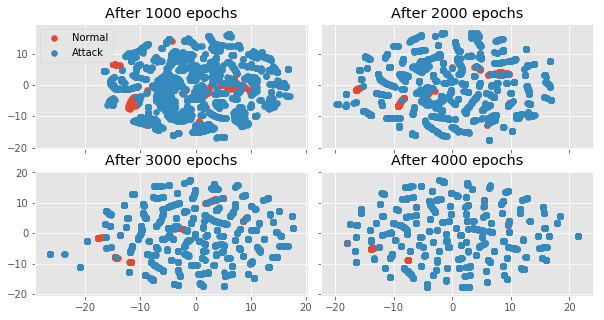

In [111]:

#plt.figure(figsize=(15,8))

f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10,5))

ax1.scatter(x = df[y_tsne=='Normal', 0], y = df[y_tsne=='Normal',1], label = 'Normal')
ax1.scatter(x = df[y_tsne=='Attack',0], y = df[y_tsne=='Attack',1], label = 'Attack')
ax1.title.set_text("After 1000 epochs")

ax2.scatter(x = df1[y_tsne=='Normal',0], y = df1[y_tsne=='Normal',1], label = 'Normal')
ax2.scatter(x = df1[y_tsne=='Attack',0], y = df1[y_tsne=='Attack',1], label = 'Attack')
ax2.title.set_text("After 2000 epochs")

ax3.scatter(x = df2[y_tsne=='Normal',0], y = df2[y_tsne=='Normal',1], label = 'Normal')
ax3.scatter(x = df2[y_tsne=='Attack',0], y = df2[y_tsne=='Attack',1], label = 'Attack')
ax3.title.set_text("After 3000 epochs")

ax4.scatter(x = df3[y_tsne=='Normal',0], y = df3[y_tsne=='Normal',1], label = 'Normal')
ax4.scatter(x = df3[y_tsne=='Attack',0], y = df3[y_tsne=='Attack',1], label = 'Attack')
ax4.title.set_text("After 4000 epochs")

plt.subplots_adjust(wspace=0.05, hspace=0.18)
ax1.legend(loc=0)




In [88]:
preprocessing.kdd_train.to_pickle("dataset/kdd_train.pkl")
preprocessing.kdd_train_label.to_pickle("dataset/kdd_train_label.pkl")

preprocessing.kdd_test.to_pickle("dataset/kdd_test.pkl")
preprocessing.kdd_test_label.to_pickle("dataset/kdd_test_label.pkl")


In [85]:
preprocessing.kdd_train

,duration,source_bytes,destination_bytes,count,same_srv_rate,serror_srv_rate,srv_serror_rate,dst_host_count,dst_host_srv_count,dst_host_same_src_port_rate,...,malware_detection_Win.Worm.Mydoom-90(1),ashula_detection_0,ashula_detection_349(1),ashula_detection_349(2),ashula_detection_350(1),ashula_detection_809(1),ashula_detection_810(1),session_icmp,session_tcp,session_udp
0,0.000000,0,0,0,0.0,0.0,0.00,0,0,0.0,...,0,1,0,0,0,0,0,0,1,0
1,0.000000,0,0,0,0.0,0.0,0.00,0,0,0.0,...,0,1,0,0,0,0,0,0,1,0
2,0.000000,0,0,0,0.0,0.0,0.00,0,0,0.0,...,0,1,0,0,0,0,0,0,1,0
3,0.000000,0,0,0,0.0,0.0,0.00,0,0,0.0,...,0,1,0,0,0,0,0,0,1,0
4,0.000000,0,0,0,0.0,0.0,0.00,0,0,0.0,...,0,1,0,0,0,0,0,0,1,0
5,0.000052,0,0,0,0.0,0.0,0.00,0,0,0.0,...,0,1,0,0,0,0,0,0,1,0
6,0.000061,0,0,0,0.0,0.0,0.00,0,0,0.0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381098,0.000487,44,104,8,1.0,0.0,0.00,84,99,0.0,...,0,1,0,0,0,0,0,0,0,1
381099,0.000558,44,104,9,1.0,0.0,0.00,84,99,0.0,...,0,1,0,0,0,0,0,0,0,1


In [87]:
preprocessing.kdd_train_label

,is_Attack,is_Normal
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
5,1,0
6,1,0
...,...,...
381098,1,0
381099,1,0
